In [1]:
from tqdm import tqdm
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import partial


In [2]:
from bingo import *
from graph import *
from counting import *
from latex import *
from parallel import *

In [3]:
RUNS = 5_000_000
DECKS=[1,2,3,4,5,10,15,20,25,30,35,40]
palette = colorblind_palette(len(DECKS))

In [4]:
np.random.seed(56734)

In [5]:
%%time

df_jokers_3_10 = quick_deck_matches_on(RUNS, decks=DECKS, accept_jokers=True, early_stop=3, discard=10)

CPU times: user 245 ms, sys: 645 ms, total: 890 ms
Wall time: 4min 37s


1.0 13.0 15.9344 (0.1590234516102581, 0.15966507185497558)
2.0 13.0 29.32412 (0.29284231645743547, 0.2936404012561627)
3.0 13.0 40.595980000000004 (0.4055294246028473, 0.4063903199029746)
4.0 13.0 50.064060000000005 (0.5002023307122936, 0.5010788683033358)
5.0 13.0 58.06998 (0.580267214923873, 0.5811322610696815)
10.0 13.0 82.41424 (0.8238084536316393, 0.8244758482785659)
15.0 13.0 92.61332 (0.9259036102569796, 0.9263621349302029)
20.0 13.0 96.91229999999999 (0.968971011660739, 0.9692742674666479)
25.0 13.0 98.68852 (0.9867851045751695, 0.9869845472581316)
30.0 13.0 99.45461999999999 (0.9944812634512534, 0.9946103766098573)
35.0 13.0 99.77013999999998 (0.9976590396864817, 0.9977429955262261)
40.0 13.0 99.90574000000001 (0.9990301152215993, 0.9990839179074271)
\begin{table}[tb]
\label{tbl:the-naturally-ocurring-bingo-miracle3-10}
\begin{tabular}{llll}
\toprule
 & Probability & CI lower & CI upper \\
Decks &  &  &  \\
\midrule
1 & 15.934% & 15.902% & 15.967% \\
2 & 29.324% & 29.284% & 29

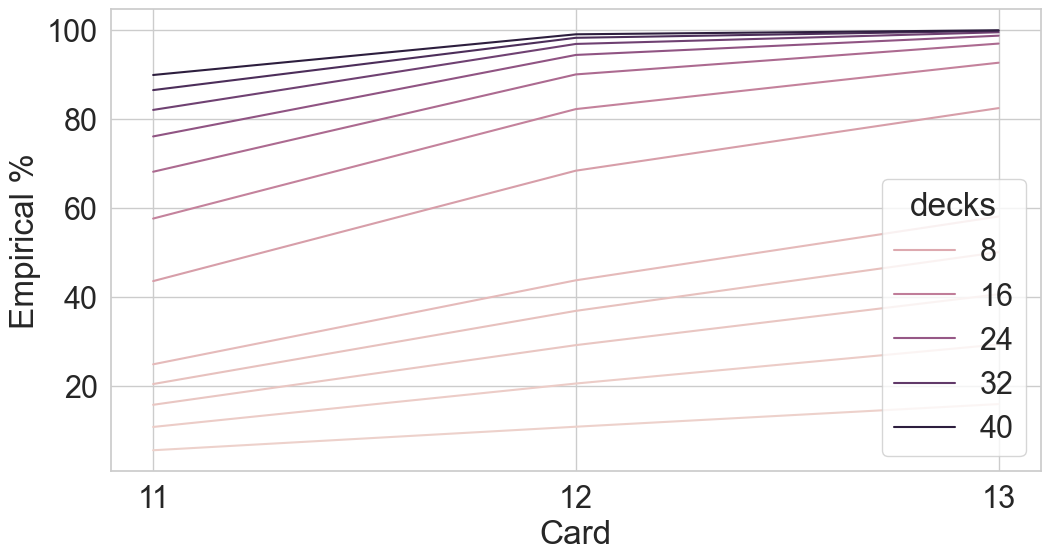

In [6]:
ax, data_3_10 = print_cumulative(df_jokers_3_10, xticks=[11, 12, 13])
for i, (decks, card, values) in data_3_10.query("card==13").iterrows():
  print(decks, card, values, confidence(values * RUNS / 100, RUNS))
prob_table_to_latex(partial_card_to_prob(data_3_10.query("card==13"), RUNS), name="the-naturally-ocurring-bingo-miracle3-10")